Drawn from https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html.

In [1]:
# Summon libraries.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib
import scipy
import numpy as np
import math

Call data.

In [3]:
# Call data. Uses PANDAS.
claims = pd.read_csv('./data/Exercise2.4Data.csv')
claims['npolicies'] = claims['npolicies']/1000
claims.head()

,npolicies,yrswithfirm,percopenclaims,claimamount
0,12.318,4,16,19.9
1,29.777,4,15,200.5
2,36.980,10,12,308.5
3,18.055,4,20,24.4
4,16.505,20,27,48.7


Normality.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

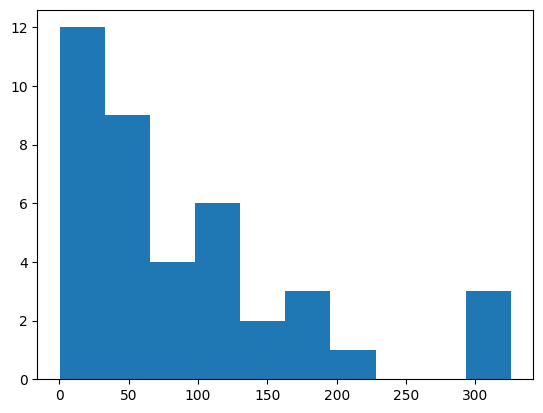

Anderson-Darling test statistic: 1.707
Shapiro-Wilks test statistic: 0.856 
Shapiro-Wilks p-value: 0.000


In [ ]:
# Sets the y-value to the y-value[name] for normality tests.
y_val = claims["claimamount"]

from matplotlib import pyplot
# Summon histogram. Uses matplotlib.
pyplot.hist(y_val)
pyplot.show()

# Uses scipy.stats for an Anderson-Darling test.
from scipy.stats import anderson
# Assign result from an Anderson-Darling test using the y-value.
result = anderson(y_val)
# Dump out result's test statistic.
print(f'Anderson-Darling test statistic: {result.statistic:.3f}')

# Uses scipy.stats for a Shapiro-Wilks test.
from scipy.stats import shapiro
# Assign results from a Shapiro-Wilks test using the y-value.
statistic, p_value = shapiro(y_val)
print(f"""Shapiro-Wilks test statistic: {statistic:.3f} 
Shapiro-Wilks p-value: {p_value:.3f}""")

Box-Cox. https://www.geeksforgeeks.org/box-cox-transformation-using-python/

Lambda is 0.3359858319959223
Anderson-Darling test statistic: 0.121
Shapiro-Wilks test statistic: 0.987 
Shapiro-Wilks p-value: 0.930


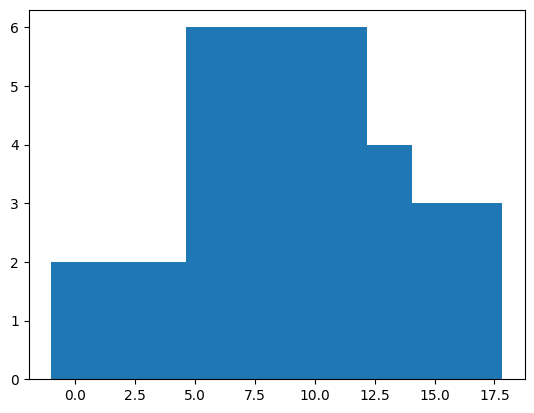

In [ ]:
from scipy.stats import boxcox
claims['claimamount_tr'], fitted_lambda = boxcox(claims['claimamount'])
print(f'Lambda is {fitted_lambda}')
y_val = claims["claimamount_tr"]

# Normality tests and histogram
result = anderson(y_val)
print(f'Anderson-Darling test statistic: {result.statistic:.3f}')
statistic, p_value = shapiro(y_val)
print(f"""Shapiro-Wilks test statistic: {statistic:.3f} 
Shapiro-Wilks p-value: {p_value:.3f}""")

pyplot.hist(y_val)
pyplot.show()


Develop models.

In [ ]:
# Develop model.
claims['claimamount_tr'] = 2 * (np.sqrt(claims['claimamount']) - 1)
formula = 'claimamount_tr ~ npolicies + yrswithfirm + percopenclaims'
fitted = smf.glm(formula=formula, data=claims, family=sm.families.Gaussian()).fit()
print(fitted.summary())
fitloglike = (fitted.llf)

                 Generalized Linear Model Regression Results                  
Dep. Variable:         claimamount_tr   No. Observations:                   40
Model:                            GLM   Df Residuals:                       36
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          52.112
Method:                          IRLS   Log-Likelihood:                -133.72
Date:                Mon, 23 Oct 2023   Deviance:                       1876.0
Time:                        10:39:24   Pearson chi2:                 1.88e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4376
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6928      5.506      0.

In [ ]:
# Null model.
formula = 'claimamount_tr ~ 1'
null = smf.glm(formula=formula, data=claims, family=sm.families.Gaussian()).fit()
print(null.summary())
nullloglike = (null.llf)

                 Generalized Linear Model Regression Results                  
Dep. Variable:         claimamount_tr   No. Observations:                   40
Model:                            GLM   Df Residuals:                       39
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          78.576
Method:                          IRLS   Log-Likelihood:                -143.53
Date:                Mon, 23 Oct 2023   Deviance:                       3064.4
Time:                        10:39:25   Pearson chi2:                 3.06e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0003178
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8333      1.402     10.583      0.0

Log likelihood. Found the names through dir() https://stackoverflow.com/questions/2675028/list-attributes-of-an-object.

In [ ]:
# Uses null and fitted log likelihoods to perform the deviance test.
deviance= -2 * (nullloglike-(fitloglike))
print(f"Deviance statistic is {deviance}.")
# Chi2.cdf is from scipy.stats.
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(deviance,3)
print(f"p-value is {pvalue}.")

Deviance statistic is 19.628721322465196.
p-value is 0.0002026295132128153.


Prediction. https://www.statology.org/statsmodels-predict/

In [ ]:
# Prediction.
predict_val = pd.DataFrame(
    {"npolicies": [15.5], "yrswithfirm": [3], "percopenclaims": [15]})
predict_val = sm.add_constant(predict_val)

# Simpler.
print(f'Predicted: {(0.5 * fitted.predict(predict_val) + 1) ** 2}')

# Isolated. This one grabs the item "values" from the array.
print(f'Predicted: {(0.5 * fitted.predict(predict_val).values[0] + 1) ** 2}')

Predicted: 0    30.359999
dtype: float64
Predicted: 30.359999314532093
